In [1]:

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Define transformations for the images
transform = transforms.Compose([
    transforms.ToTensor(),                                 # Convert images to PyTorch tensors
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalize with mean and std
])

# Download and load training dataset
trainset = torchvision.datasets.CIFAR10(
    root='./dataset',       # Directory where data will be stored
    train=True,          # Get the training set
    download=True,       # Download if not already present
    transform=transform  # Apply the transforms
)

# Create training data loader with batching
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=64,       # Number of samples per batch
    shuffle=True,        # Shuffle the data
    num_workers=2        # Number of subprocesses for data loading
)

# Download and load test dataset
testset = torchvision.datasets.CIFAR10(
    root='./dataset',
    train=False,
    download=True,
    transform=transform
)

# Create test data loader
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False,
    num_workers=2
)

100%|██████████| 170498071/170498071 [00:02<00:00, 81322309.62it/s]


Extracting ./dataset/cifar-10-python.tar.gz to ./dataset
Files already downloaded and verified


In [3]:
# Class names for reference
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


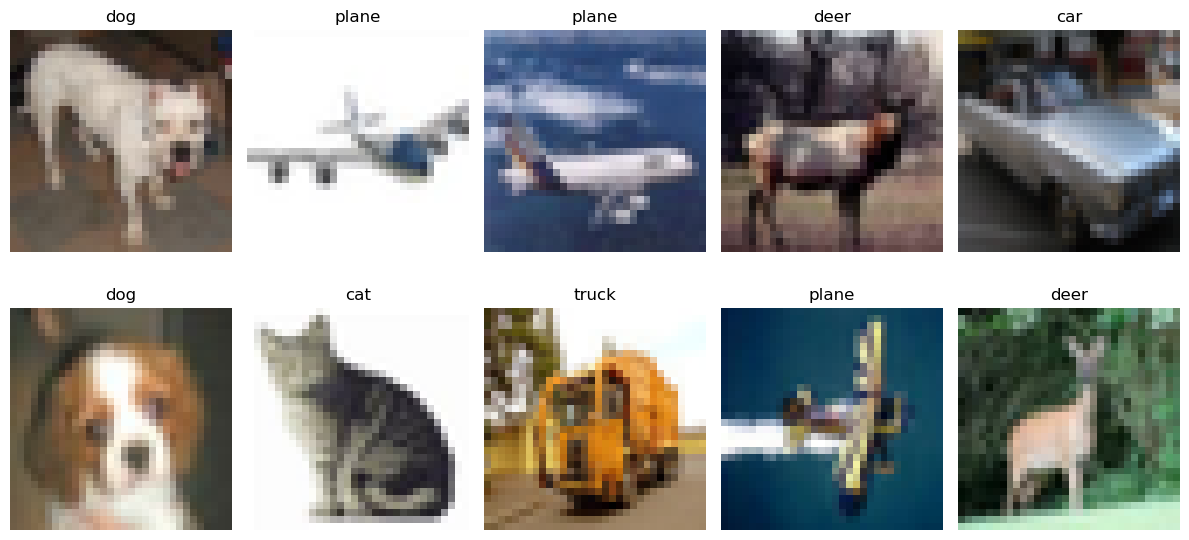

Training dataset size: 50000
Test dataset size: 10000
Image shape: torch.Size([3, 32, 32])
Available classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [6]:
def show_images():
    # Get a batch from the data loader
    dataiter = iter(trainloader)
    images, labels = next(dataiter)
    
    # Convert tensors to numpy for display
    images = images.numpy()
    
    # Plot images
    fig, axes = plt.subplots(2, 5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        # Reshape and normalize image for display
        img = np.transpose(images[i], (1, 2, 0)) * 0.5 + 0.5
        ax.imshow(img)
        ax.set_title(classes[labels[i]])
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Uncomment to display example images
show_images()

print(f"Training dataset size: {len(trainset)}")
print(f"Test dataset size: {len(testset)}")
print(f"Image shape: {trainset[0][0].shape}")
print(f"Available classes: {classes}")